In [11]:
from rstools import RSoftUserFunction

fem_folder = r"C:\Users\justinvella\Desktop\Results\MMF Testing"
fem_field = "femtmp_ex.m10"
uf = RSoftUserFunction()
uf.read(fem_folder + fem_field)

x= uf.get_arrays()
print(x)



()


In [ ]:
import imageio.v3 as iio
import glob, subprocess


# Folder where your BMP files are:
bmp_folder = r"C:\Users\justinvella\Desktop\Results\MMF Testing"

# Find BMP files (sorted order important!)
bmp_files = sorted(glob.glob(f"{bmp_folder}\\*.bmp"))

# Output GIF path
output_gif = f"{bmp_folder}\\animation.gif"

# Read all frames and save to GIF
frames = [iio.imread(file) for file in bmp_files]
iio.imwrite(output_gif, frames, duration=0.1)  # duration = time per frame in seconds

print(f"Saved animation to {output_gif}")


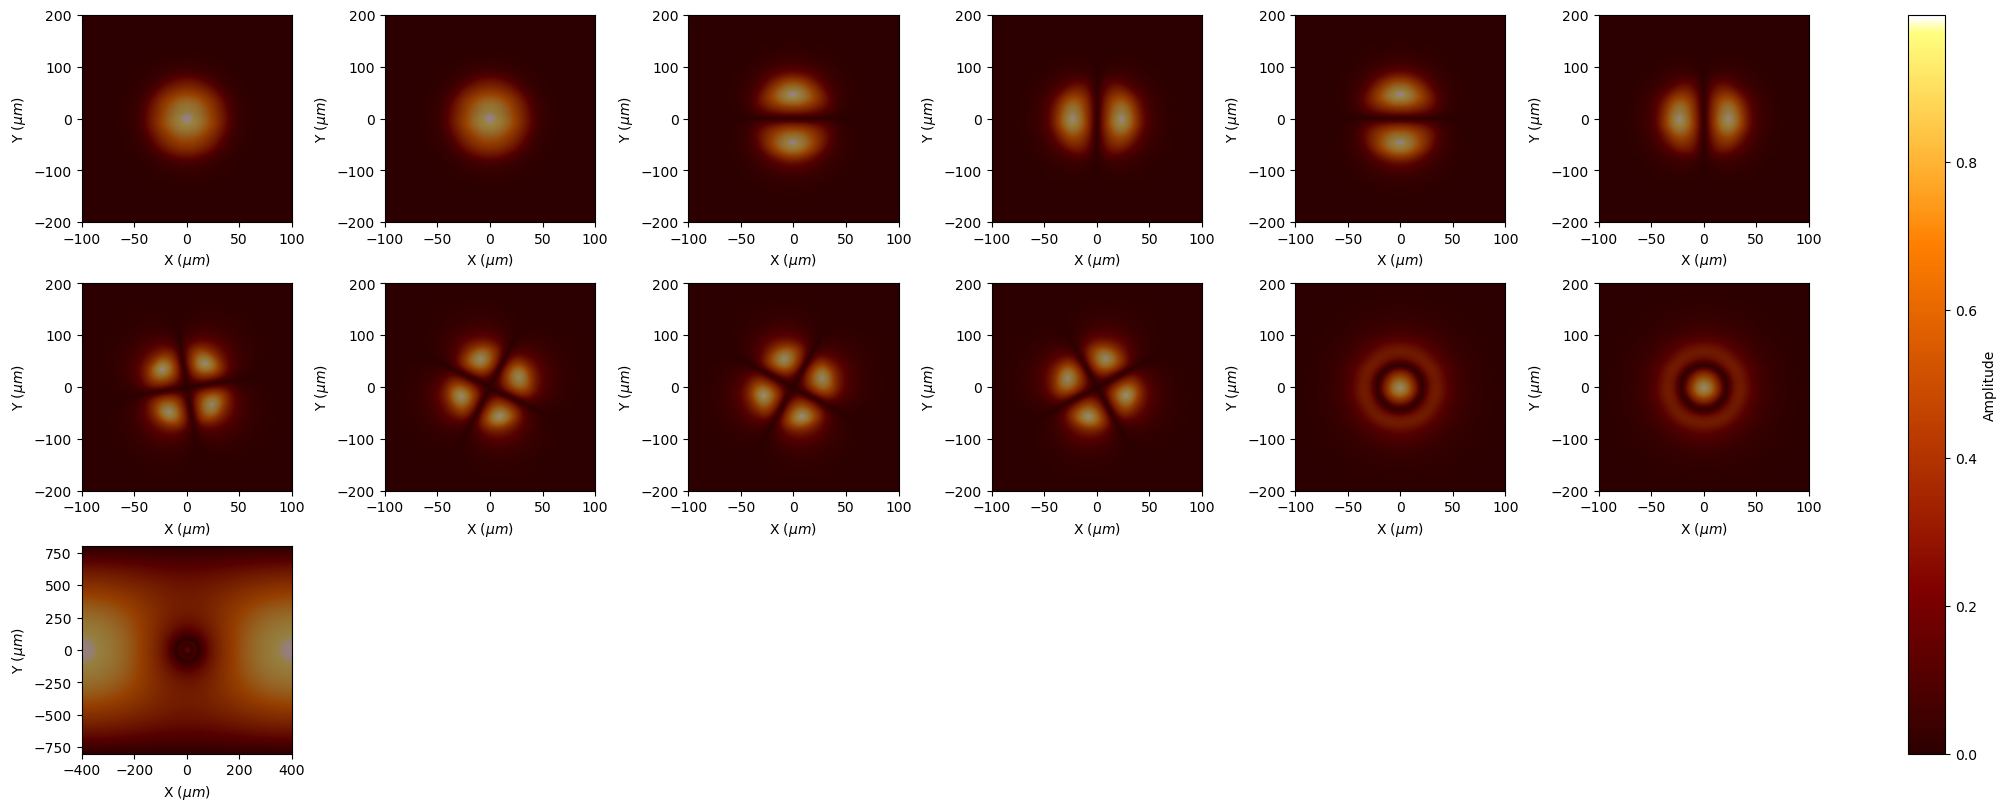

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
import ehtplot.color
from Functions import *

mode_desired = mode_wanted_considering_mode_orientations(LP_mode_dict, 6) 
total_subplots = 1 + mode_desired * 3 # total number of modes including orientations of polarisation
cols = 6
rows = total_subplots // cols

# check if additional row is needed
if total_subplots % cols !=0:
    rows +=1

pos_index = range(1, total_subplots + 1)

fem_folder = r"C:\Users\justinvella\Desktop\Results\MMF Testing"

fig, axes = plt.subplots(rows, cols, figsize=(20,8), constrained_layout = True)

im_list = []

for i, ax in enumerate(axes.flat):
    if i >= total_subplots:
        ax.axis('off')  # Hide extra axes if grid is larger than data
        continue

    if i < 10:
        fem_field = f"femtmp_ex.m0{i}"
    else:
        fem_field = f"femtmp_ex.m{i}"

    dat = pd.read_csv(fem_folder + "\\" + fem_field, skiprows = 4, sep=r'\s+', header = None)
    Nx, Ny = dat.shape
    new_x = np.linspace(-Nx//2, Nx//2, Nx)
    new_y = np.linspace(-Ny//2, Ny//2, Ny)

    im = ax.imshow(np.abs(np.rot90(dat.values)),
                   extent=[new_x[0], new_x[-1], new_y[0], new_y[-1]],
                   aspect='auto', cmap='afmhot_10u')

    im_list.append(im)

    ax.set_xlabel("X ($\mu m$)")
    ax.set_ylabel("Y ($\mu m$)")

    if i != total_subplots-1:
        ax.set_xlim(-100,100)
        ax.set_ylim(-200,200)

fig.colorbar(im_list[-1], ax=axes.ravel().tolist(), location='right', label='Amplitude')
plt.show()

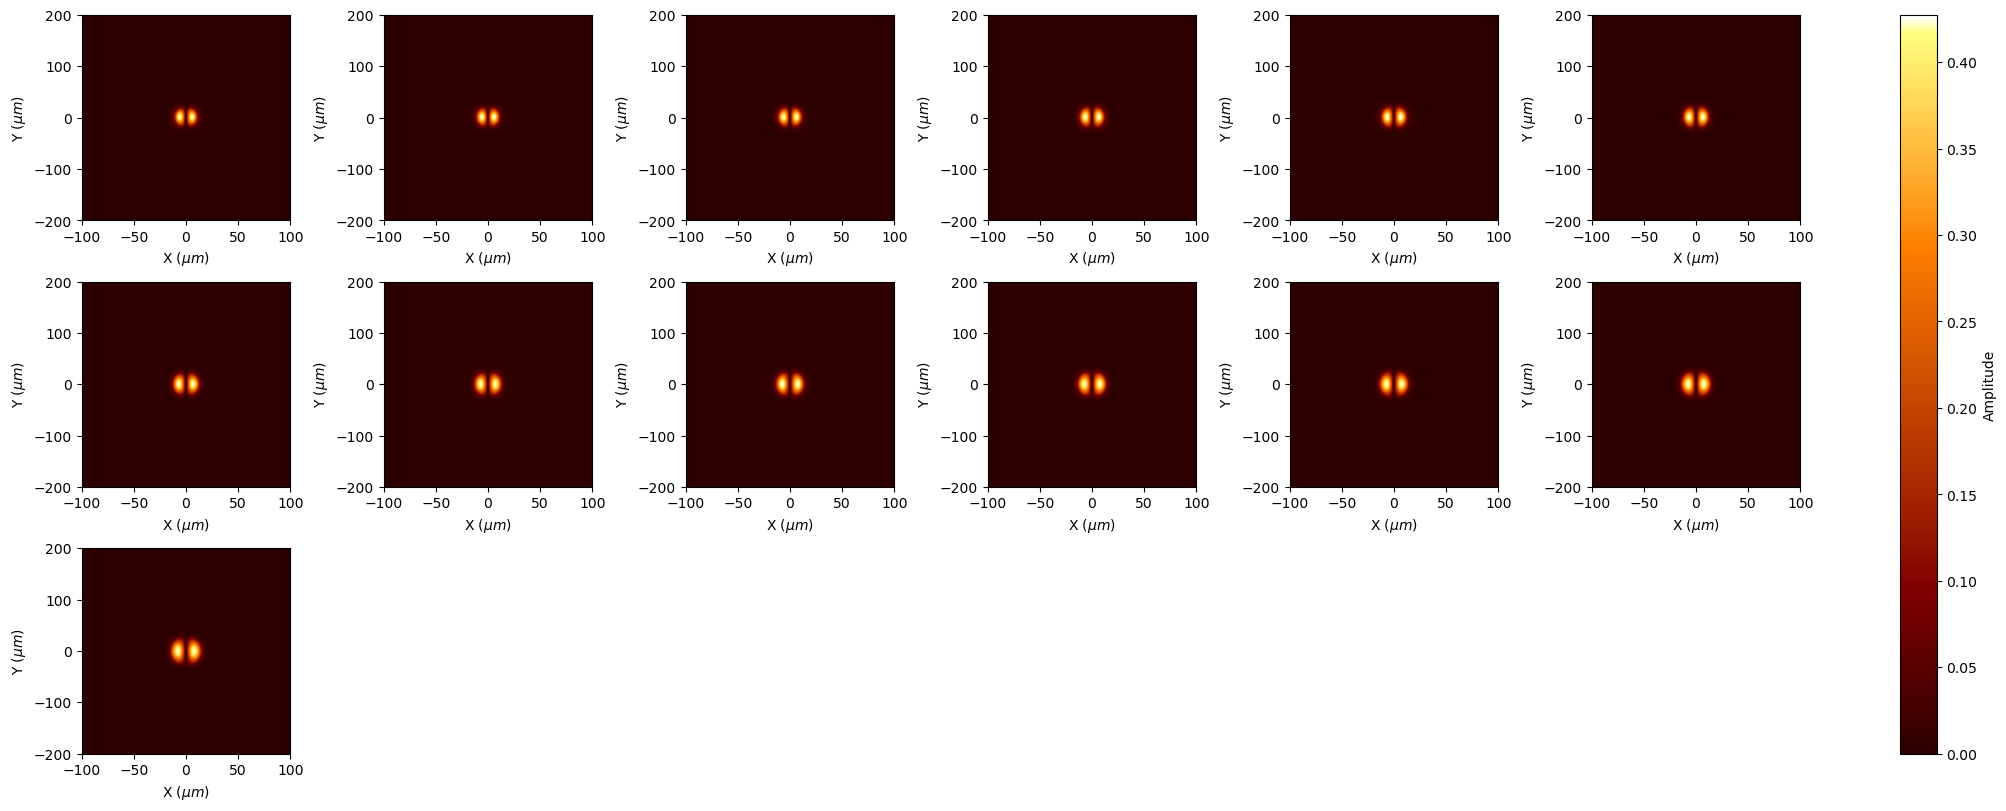

In [ ]:
import glob
import matplotlib.animation as animation
mode_desired = mode_wanted_considering_mode_orientations(LP_mode_dict, 6) 
total_subplots = 1 + mode_desired * 3 # total number of modes including orientations of polarisation
cols = 6
rows = total_subplots // cols

# check if additional row is needed
if total_subplots % cols !=0:
    rows +=1

pos_index = range(1, total_subplots + 1)

results_folder = r"C:\Users\justinvella\Desktop\Results\Sim_taper_16.534758_core_delta_0.012290_core_diam_8.200000\LP11b\Image_Files_For_Animation"

file_list = sorted(glob.glob(f"{results_folder}/XY_0."))

fig, axes = plt.subplots(rows, cols, figsize=(20,8), constrained_layout = True)

im_list = []

for i, ax in enumerate(axes.flat):
    if i >= total_subplots:
        ax.axis('off')  # Hide extra axes if grid is larger than data
        continue

    if i < 10:
        field_slice = f"XY_0.00{i}"
    else:
        field_slice = f"XY_0.0{i}"

    dat = pd.read_csv(results_folder + "\\" + field_slice, skiprows = 4, sep=r'\s+', header = None)
    dat = np.asarray(dat)
    amp = dat[:, ::2]
    Nx, Ny = dat.shape
    new_x = np.linspace(-Nx//2, Nx//2, Nx)
    new_y = np.linspace(-Ny//2, Ny//2, Ny)

    im = ax.imshow(amp,
                   extent=[new_x[0], new_x[-1], new_y[0], new_y[-1]],
                   aspect='auto', cmap='afmhot_10u')

    im_list.append(im)

    ax.set_xlabel("X ($\mu m$)")
    ax.set_ylabel("Y ($\mu m$)")
    ax.set_xlim(-100,100)
    ax.set_ylim(-200,200)

fig.colorbar(im_list[-1], ax=axes.ravel().tolist(), location='right', label='Amplitude')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np
import glob

def make_animation(data_folder="", file_pattern="XY_0.*", output_gif="animation.gif", interval=100):
    
    file_list = sorted(glob.glob(f"{data_folder}/{file_pattern}"))

    print(f"Found {len(file_list)} files.")

    # Load first frame correctly
    first_file = file_list[0]
    dat = pd.read_csv(first_file, skiprows=4, sep=r'\s+', header=None)
    dat = np.rot90(np.asarray(dat))
    amp = dat[:, ::2]
    Nx, Ny = dat.shape
    new_x = np.linspace(-Nx//2, Nx//2, Nx)
    new_y = np.linspace(-Ny//2, Ny//2, Ny)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(amp,
                   extent=[new_x[0], new_x[-1], new_y[0], new_y[-1]],
                   aspect='auto', cmap='afmhot_10u')
    cbar = fig.colorbar(im, ax=ax, label='Amplitude')
    
    def update(frame_idx):
        filename = file_list[frame_idx]
        dat = pd.read_csv(filename, skiprows=4, sep=r'\s+', header=None)
        dat = np.asarray(np.rot90(dat))
        amp = dat[:, ::2]
        im.set_array(amp)
        ax.set_title(f"Frame {frame_idx}")
        return [im]

    ani = animation.FuncAnimation(
        fig, update, frames=len(file_list), blit=True, interval=interval, repeat=True
    )

    ani.save(output_gif, writer='pillow')
    print(f"Saved animation to {output_gif}")

    plt.close(fig) 

res_fold = r"C:\Users\justinvella\Desktop\Results\Sim_taper_16.534758_core_delta_0.012290_core_diam_8.200000\LP01\Anim_file"
make_animation(data_folder=res_fold, file_pattern="XY_0.*", output_gif="LP01_anim.gif", interval=100)

Found 401 files.
Saved animation to LP01_anim.gif
